In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np_noise = np.random.rand(10)
print(np_noise/1000)

[0.00016315 0.00065674 0.00094971 0.00058606 0.00094357 0.0004946
 0.00093664 0.00091338 0.00012084 0.0006558 ]


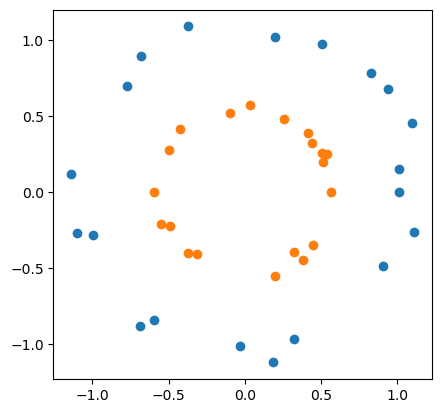

In [5]:
fig, ax = plt.subplots()
ax.set_aspect(aspect='equal')

radius = 1
num_point = 20
np_noise = np.random.rand(num_point)/5+1
np_radian_range = np.linspace(0,2*np.pi,num_point)*np_noise
np_x = np.cos(np_radian_range)*(radius*np_noise)
np_y = np.sin(np_radian_range)*(radius*np_noise)
data_positive = np.stack((np_x,np_y)).T

ax.scatter(np_x,np_y)

radius = 0.5
num_point = 20
np_noise = np.random.rand(num_point)/5+1
np_radian_range = np.linspace(0,2*np.pi,num_point)*np_noise
np_x = np.cos(np_radian_range)*(radius*np_noise)
np_y = np.sin(np_radian_range)*(radius*np_noise)
data_negative = np.stack((np_x,np_y)).T

ax.scatter(np_x,np_y)

In [19]:
tf_data_positive = tf.data.Dataset.from_tensor_slices(data_positive)
tf_data_positive = tf_data_positive.map(lambda x: x,100)

In [20]:
for item in tf_data_positive.take(10):
    print(item)

tf.Tensor([1.01602161 0.        ], shape=(2,), dtype=float64)
tf.Tensor([1.09547257 0.45286364], shape=(2,), dtype=float64)
tf.Tensor([0.83079408 0.7790537 ], shape=(2,), dtype=float64)
tf.Tensor([0.50778742 0.97508753], shape=(2,), dtype=float64)
tf.Tensor([0.20113289 1.02080256], shape=(2,), dtype=float64)
tf.Tensor([-0.37085323  1.08729206], shape=(2,), dtype=float64)
tf.Tensor([-0.67943909  0.89054328], shape=(2,), dtype=float64)
tf.Tensor([-0.77093017  0.69730283], shape=(2,), dtype=float64)
tf.Tensor([-1.14302284  0.11687778], shape=(2,), dtype=float64)
tf.Tensor([-1.10368872 -0.27135966], shape=(2,), dtype=float64)


In [10]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
model = Sequential([
    layers.Dense(8,activation = 'relu', input_shape = (1,2)),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])
model.build()
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 8)              24        
                                                                 
 dense_10 (Dense)            (None, 1, 8)              72        
                                                                 
 dense_11 (Dense)            (None, 1, 1)              9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
